#Project7-To perfom EDA and train the machine to develop an algorithm that predicts the number of wins for a 
given team in the next season based on several different indicators of success of past season

In [1]:
# Importing some useful libraries
import pandas as pd
import numpy as np

In [3]:
df_baseball=pd.read_csv('baseball.csv')
df_baseball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df_baseball.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

We can see that the column names of above data are difficult to understand, 
we need to elaborate these column name to make it easy to understand

In [7]:
#Changning Column names to make it easy to understand the parameters
df_baseball.columns=['Win','Runs','At Bats','Hits','Doubles','Triples','Homeruns','Walks','Strikeouts','Stolen Bases','Runs Allowed','Earned Runs','Earned Run Average','Complete Games','Shutouts','Saves','Errors']

In [8]:
#Dataset after changing the names of columns
df_baseball

,Win,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In this Dataset we can see that there were 29 teams had participated in the tournament,and respective other details 
for each team is shown

In [9]:
# Checking datatypes of each variables
df_baseball.dtypes

Win                     int64
Runs                    int64
At Bats                 int64
Hits                    int64
Doubles                 int64
Triples                 int64
Homeruns                int64
Walks                   int64
Strikeouts              int64
Stolen Bases            int64
Runs Allowed            int64
Earned Runs             int64
Earned Run Average    float64
Complete Games          int64
Shutouts                int64
Saves                   int64
Errors                  int64
dtype: object

In [10]:
#Checking for null values
df_baseball.isnull().sum()

Win                   0
Runs                  0
At Bats               0
Hits                  0
Doubles               0
Triples               0
Homeruns              0
Walks                 0
Strikeouts            0
Stolen Bases          0
Runs Allowed          0
Earned Runs           0
Earned Run Average    0
Complete Games        0
Shutouts              0
Saves                 0
Errors                0
dtype: int64

We can see that there is no null/empty value, data is clean

In [11]:
#Checking description of dataset
df_baseball.describe()

,Win,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [12]:
df_baseball.shape

(30, 17)

In [13]:
df_baseball.corr()

,Win,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
Win,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


--Performing EDA for the above data to get insight of data--

In [14]:
# Importing some more neccessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

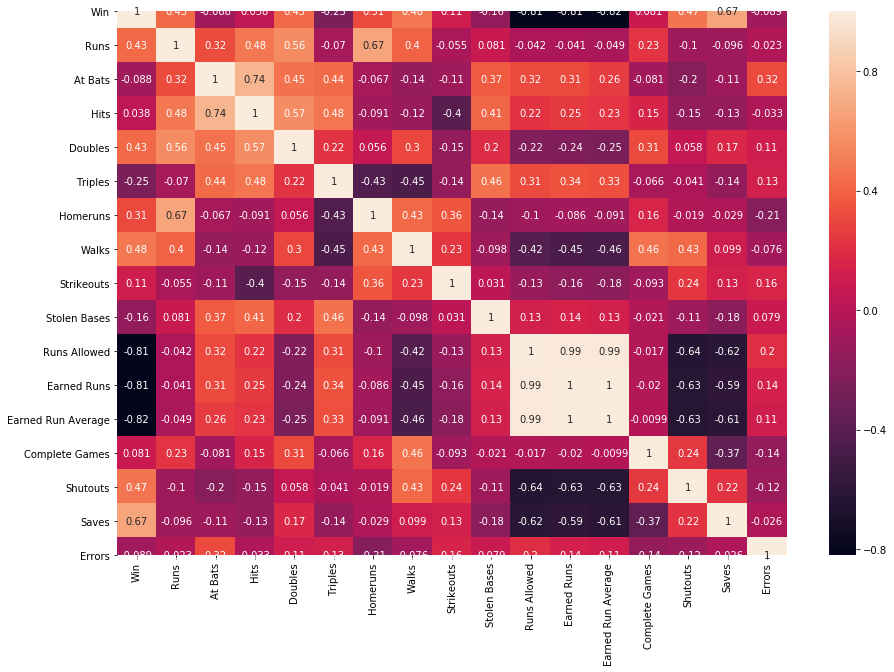

In [18]:
#Checking correlation using Heat Map to get high and low correlated parameteres
plt.figure(figsize=(15,10))
sns.heatmap(df_baseball.corr(),annot=True)
plt.show()

We can see highly correlated values with respect to wins and other variables 

C:\Users\Arjun Rao\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


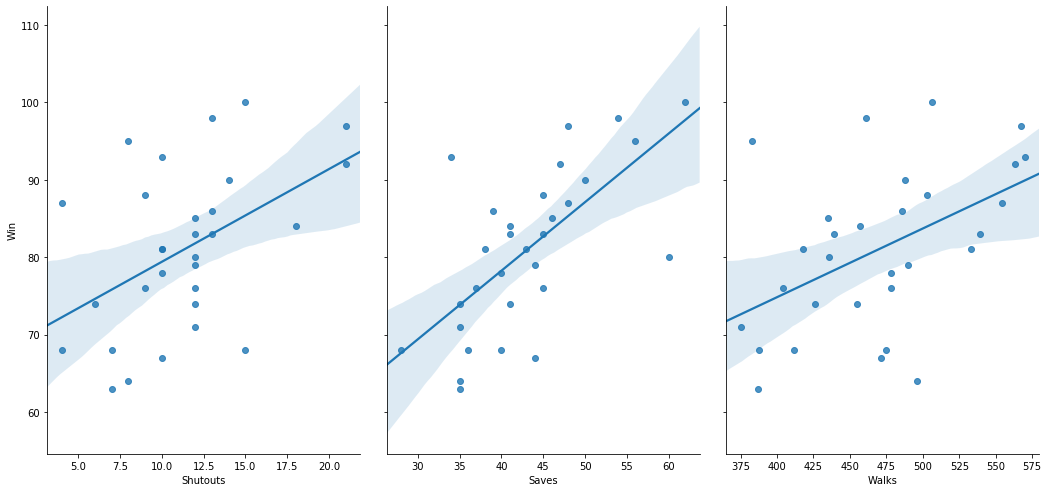

In [19]:
sns.pairplot(x_vars=['Shutouts', 'Saves', 'Walks'], y_vars='Win', size=7, aspect=0.7, kind='reg',data=df_baseball)
plt.show()

In [21]:
#Checking different indicators of Winner, 1st Runner up and 2nd Runner up team
import warnings
warnings.filterwarnings("ignore")
df_baseball.loc[df_baseball['Win']== df_baseball['Win'].max()]

,Win,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
15,100,647,5484,1386,288,39,137,506,1267,69,525,478,2.94,1,15,62,96


In [22]:
df_baseball.loc[df_baseball['Win']== 98]

,Win,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
16,98,697,5631,1462,292,27,140,461,1322,98,596,532,3.21,0,13,54,122


In [23]:
df_baseball.loc[df_baseball['Win']== 97]

,Win,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
17,97,689,5491,1341,272,30,171,567,1518,95,608,546,3.36,6,21,48,111


**We can see that the toppers of the tournaments have maximum 'Shutouts','Save' and 'Walks'**

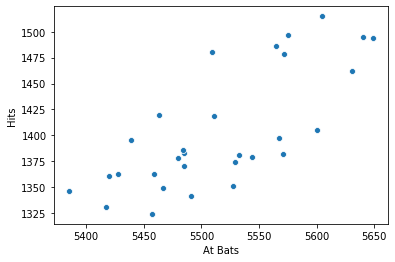

In [36]:
sns.scatterplot(x='At Bats',y='Hits',data=df_baseball)
plt.show()

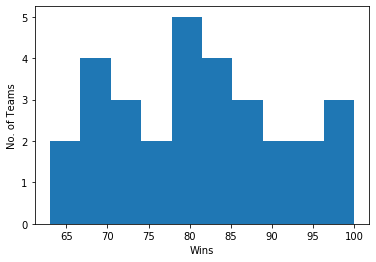

In [38]:
plt.hist(df_baseball['Win'])
plt.xlabel('Wins')
plt.ylabel('No. of Teams')
plt.show()

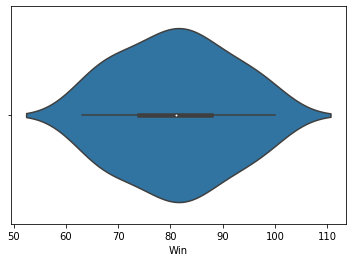

In [40]:
sns.violinplot(df_baseball['Win'],scale='count')
plt.show()

We can see that most of the team able to win 80-90 games

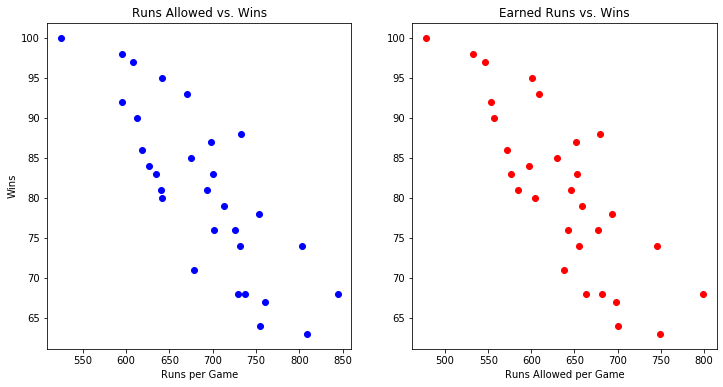

In [41]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df_baseball['Runs Allowed'], df_baseball['Win'], c='blue')
ax1.set_title('Runs Allowed vs. Wins')
ax1.set_ylabel('Wins')
ax1.set_xlabel('Runs per Game')

ax2.scatter(df_baseball['Earned Runs'], df_baseball['Win'], c='red')
ax2.set_title('Earned Runs vs. Wins')
ax2.set_xlabel('Runs Allowed per Game')

plt.show()

**We can see that Runs Allowed and Earned Runs should be less inorder to be a winner**

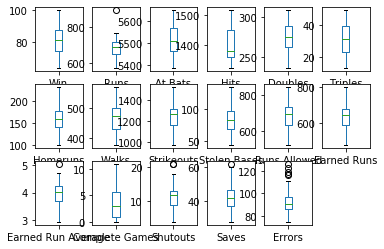

In [51]:
#Checking for outliers using box plot
df_baseball.plot(kind='box',subplots=True,layout=(3,6))
plt.show()

We can see that a few outliers are present which we have to remove

In [52]:
#Removing outliers using z score
from scipy.stats import zscore
z_score=np.abs(zscore(df_baseball))
z_score

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [53]:
print(df_baseball.shape)
thresold=3
baseball=df_baseball[(z_score<3).all(axis=1)]
baseball.shape

(30, 17)


(29, 17)

We can see that outliers are removed

In [54]:
#Separating the input and output variables
x=baseball.drop(columns=['Win'])
y=baseball[['Win']]

In [55]:
#Checking for skewness
x.skew()

Runs                 -0.215364
At Bats               0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Homeruns              0.450862
Walks                 0.151193
Strikeouts           -0.233815
Stolen Bases          0.494966
Runs Allowed          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Games        0.854980
Shutouts              0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

In [57]:
#Removing the positive  and negative skewness using log and square funtcions respectively
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [58]:
# Again Checking for skewness
x.skew()

Runs                 -0.215364
At Bats               0.169573
Hits                  0.738455
Doubles              -0.335304
Triples               0.090124
Homeruns              0.450862
Walks                 0.151193
Strikeouts           -0.233815
Stolen Bases          0.494966
Runs Allowed          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Games       -0.275681
Shutouts             -0.116970
Saves                 0.109983
Errors                0.586101
dtype: float64

In [61]:
y.skew()

Win    0.119013
dtype: float64

#In this data set we can see that there is linear/continuos data  hence we use regression method to train and predict the variables

In [59]:
#Importing some neccessary libraries 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [62]:
#Checking for best random state which give best r2 score for various training techniques used to get best prediction
# Defining a function to check for best random state and r2 score.
def maxr2_score(tec,x,y):
    max_r_score=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size=0.20)
        tec.fit(train_x,train_y)
        pred = tec.predict(test_x)
        temp=r2_score(test_y,pred)
        if temp>max_r_score:
            max_r_score=temp
            final_r_state=r_state
    print("max r2 score is : ",max_r_score, 'corresponding to random state: ',final_r_state,)

In [71]:
#Importing various methods from libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [64]:
LR=LinearRegression()
maxr2_score(LR,x,y)

max r2 score is :  0.8497244829153976 corresponding to random state:  73


In [65]:
DT=DecisionTreeRegressor()
maxr2_score(DT,x,y)

max r2 score is :  0.8410232983097304 corresponding to random state:  46


In [145]:
KN=KNeighborsRegressor()
maxr2_score(KN,x,y)

max r2 score is :  0.7544084056646871 corresponding to random state:  46


In [146]:
RF=RandomForestRegressor()
maxr2_score(RF,x,y)

max r2 score is :  0.8061870503597124 corresponding to random state:  75


In [141]:
AB=AdaBoostRegressor()
maxr2_score(AB,x,y)

max r2 score is :  0.8316542890520695 corresponding to random state:  48


In [140]:
GB=GradientBoostingRegressor()
maxr2_score(GB,x,y)

max r2 score is :  0.7906824297320976 corresponding to random state:  47


We can see the r2 score using different techniques, and Decision Tree is giving maximum r2 score

In [123]:
#Using Grid search CV for best parameters
DT=DecisionTreeRegressor()
parameters = {'criterion':['mae','mse']}
clf = GridSearchCV(DT,parameters, cv=10)
clf.fit(x,y)
clf.best_params_

{'criterion': 'mae'}

In [120]:
DT=DecisionTreeRegressor(criterion='mae')
maxr2_score(DT,x,y)

max r2 score is :  0.9049526584122359 corresponding to random state:  99


We can see that we are getting best r2 score using Decision Tree Regression

In [147]:
#Saving our final model using Random Forest Regression method
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=99,test_size=0.20)
DT.fit(train_x,train_y)
pred=DT.predict(test_x)

In [151]:
#Saving final model using joblib
from sklearn.externals import joblib 
  

joblib.dump(DT, 'DT_baseball.pkl')

['DT_baseball.pkl']

** This is the best and final model we have saved **